<a href="https://colab.research.google.com/github/Argaviria/Se-ales/blob/main/DFT_FFT_Examples_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de bibliotecas

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2



plt.style.use('seaborn-poster')
%matplotlib inline


In [ ]:
Punto 1

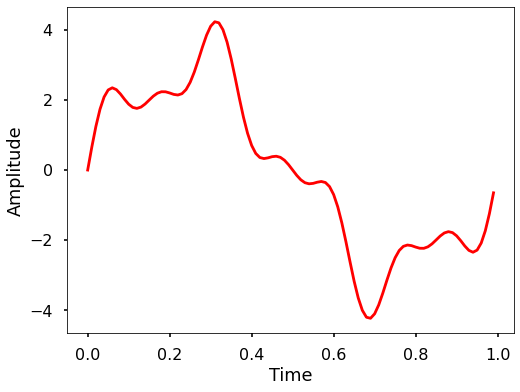

In [3]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

#Se crea una función senosoidal de frecuencia 1 Hz y amplitud 3
freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

#Se crea una función senosoidal de frecuencia 4 Hz y amplitud 1
freq = 4
x += np.sin(2*np.pi*freq*t)

#Se crea una función senosoidal de frecuencia 7 Hz y amplitud 0.5
freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)


plt.figure(figsize = (8, 6))
#graficamos la función x, notar que la función es la suma de las funciones sinusoidales de diferentes frecuencias 
plt.plot(t, x, 'r')
plt.xlabel('Time')
plt.ylabel('Amplitude') #Nombre del eje y 

plt.show()

In [4]:
#Se crea la función DFT la cual recibe como argumento la función x del bloque anterior
#esta función se encarga de hacer la Transformada discreta de Fourier

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)                            #Se toma la longitud de la fución
    n = np.arange(N)                      #Hacemos un arreglo de la longitud de la función 
    k = n.reshape((N, 1))                 #Reescalamos el arreglo sin cambiar los datos
    e = np.exp(-2j * np.pi * k * n / N)   #Función exponencial que necesita la Transformada para poder opersrse
    
    X = np.dot(e, x)              
    
    return X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


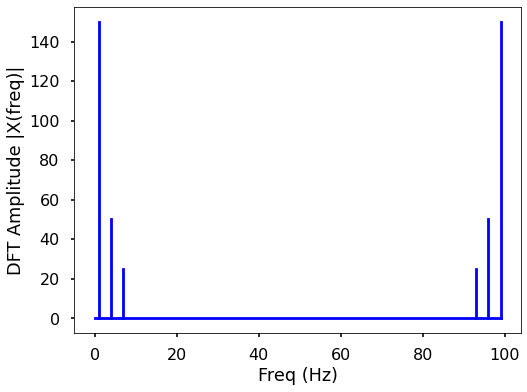

In [5]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [6]:
#Definimos la función sig que recibe como parámetro la variable sr que controla la frecuencia de muestreo 
#y genera una señal de 1 dimensión dependiendo de este valor 

def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.cos(2*np.pi*freq*t)
    return x

In [7]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

362 ms ± 8.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# sampling rate 20000
sr = 200
%timeit DFT(gen_sig(sr))

6.69 ms ± 80.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##Fast Fourier Transform

In [9]:
#Definimos la función FFT que recibe como parametro la función x
# realizamos la Transformada rápida de Fourier

def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

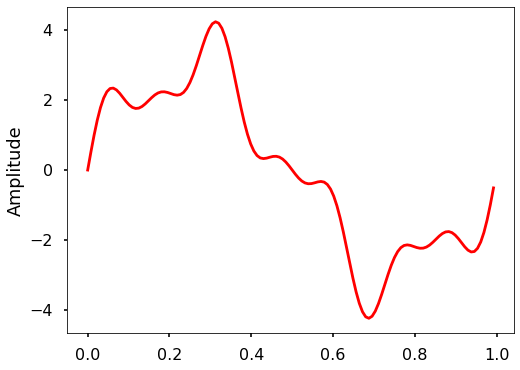

In [10]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


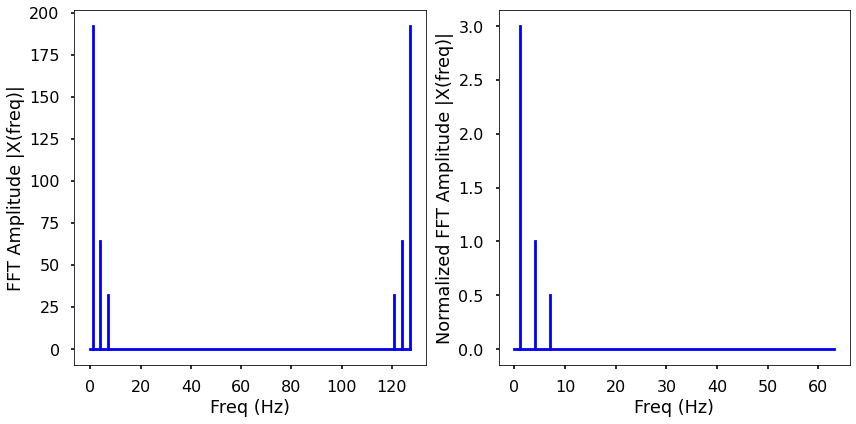

In [11]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [12]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [13]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

30.7 ms ± 976 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [15]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [16]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

127 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
16 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = int(FFT(x[::2]))
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])

In [28]:
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))


TypeError: ignored

In [ ]:
%timeit DFT_slow(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

In [36]:
df = pd.read_csv('930-data-export.csv', delimiter=',', parse_dates=[1])
df.rename(columns={'Timestamp (Hour Ending)':'hour', 'Total CAL Demand (MWh)':'demand'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [34]:
df #vemos cómo es la tabla de datos que importamos del archivo con el que vamos a trabajar

,Region Code,hour,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Total Interchange (MWh)
0,CAL,2019-11-30 00:00:00,27559,27673,15924,-8632
1,CAL,2019-11-30 01:00:00,26316,26588,15095,-8563
2,CAL,2019-11-30 02:00:00,25559,25697,14551,-8573
3,CAL,2019-11-30 03:00:00,24909,25162,14274,-8497
4,CAL,2019-11-30 04:00:00,24656,24905,14457,-8204
...,...,...,...,...,...,...
740,CAL,2019-12-30 20:00:00,34447,35029,19212,-10029
741,CAL,2019-12-30 21:00:00,33678,34129,18904,-9727
742,CAL,2019-12-30 22:00:00,32365,32674,18353,-9776
743,CAL,2019-12-30 23:00:00,30265,30407,17603,-8464


In [37]:
plt.figure(figsize = (12, 6))
plt.plot(df['hour'], df['demand'])
plt.xlabel('Datetime')
plt.ylabel('California electricity demand (MWh)')
plt.xticks(rotation=25) 
plt.show()

KeyError: ignored

<Figure size 864x432 with 0 Axes>